In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("heart.processed.cleveland.data", na_values="?")
df = df.dropna()
df = df.astype({"restecg":'int', "thal":'int', "slope":'int', "cp":'int'}) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    int64  
 13  target    297 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 34.8 KB


In [3]:
corr = df.corr()['target'].abs().sort_values()
corr

fbs         0.049040
chol        0.066448
trestbps    0.159620
restecg     0.184136
age         0.222156
sex         0.226797
slope       0.374689
exang       0.391613
cp          0.404248
thalach     0.420639
oldpeak     0.501461
thal        0.513377
ca          0.521178
target      1.000000
Name: target, dtype: float64

In [4]:
df.loc[df['target'] > 1, ['target']] = 1
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1,145.0,233.0,1.0,2,150.0,0.0,2.3,3,0.0,6,0
1,67.0,1.0,4,160.0,286.0,0.0,2,108.0,1.0,1.5,2,3.0,3,1
2,67.0,1.0,4,120.0,229.0,0.0,2,129.0,1.0,2.6,2,2.0,7,1
3,37.0,1.0,3,130.0,250.0,0.0,0,187.0,0.0,3.5,3,0.0,3,0
4,41.0,0.0,2,130.0,204.0,0.0,2,172.0,0.0,1.4,1,0.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4,140.0,241.0,0.0,0,123.0,1.0,0.2,2,0.0,7,1
298,45.0,1.0,1,110.0,264.0,0.0,0,132.0,0.0,1.2,2,0.0,7,1
299,68.0,1.0,4,144.0,193.0,1.0,0,141.0,0.0,3.4,2,2.0,7,1
300,57.0,1.0,4,130.0,131.0,0.0,0,115.0,1.0,1.2,2,1.0,7,1


In [5]:
# Helper function for plotting side by side
def sideplot(df, col, kind="bar", title=None):
    assert kind in ["bar", "hist"]
    fig = plt.figure(figsize=(10, 6))
    if kind == "bar":
        ax1 = plt.subplot(2, 2, 1)
        df[df.target == 1][['target', col]].groupby(col).count().plot(kind='bar', rot=0, legend=False, ax=ax1, color="#268bd2")
        ax2 = plt.subplot(2, 2, 2)
        df[df.target == 0][['target', col]].groupby(col).count().plot(kind='bar', rot=0, legend=False, ax=ax2, color="#268bd2")
    else:
        ax1 = plt.subplot(2, 2, 1)
        plt.hist(df[df.target == 1][col], color="#268bd2")
        plt.xlabel(col)
        ax2 = plt.subplot(2, 2, 2)
        plt.hist(df[df.target == 0][col], color="#268bd2")
        plt.xlabel(col)
    # Re-adjusting
    ylim = (0, max(ax1.get_ylim()[1], ax2.get_ylim()[1]))
    ax1.set_ylim(ylim)
    ax2.set_ylim(ylim)
    xlim = (min(ax1.get_xlim()[0], ax2.get_xlim()[0]), max(ax1.get_xlim()[1], ax2.get_xlim()[1]))
    ax1.set_xlim(xlim)
    ax2.set_xlim(xlim)
    if title is not None:
        fig.suptitle(title)
    #plt.subplots_adjust(top=0.99)

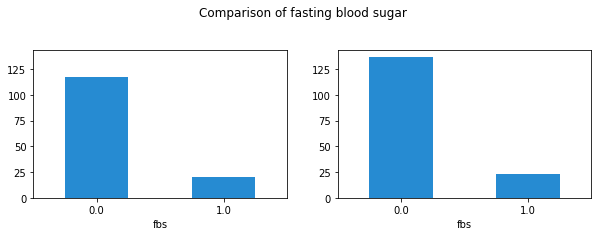

In [6]:
sideplot(df, "fbs", kind="bar", title="Comparison of fasting blood sugar")

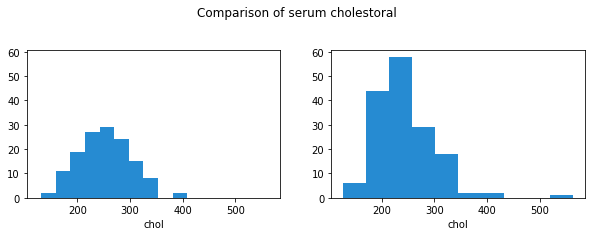

In [7]:
sideplot(df, "chol", kind="hist", title="Comparison of serum cholestoral")

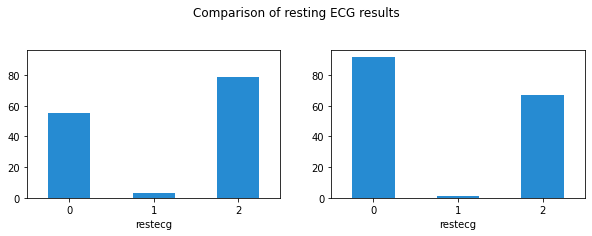

In [8]:
sideplot(df, "restecg", kind="bar", title="Comparison of resting ECG results")

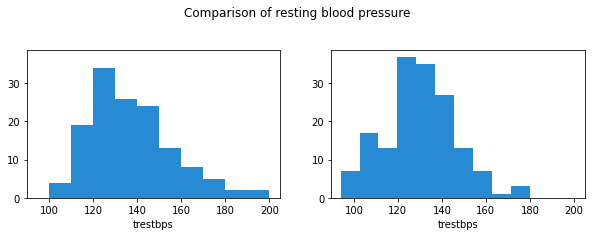

In [9]:
sideplot(df, "trestbps", kind="hist", title="Comparison of resting blood pressure")

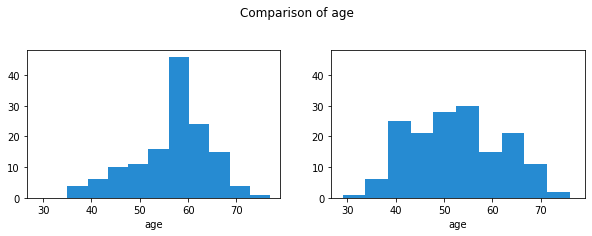

In [10]:
sideplot(df, "age", kind="hist", title="Comparison of age")

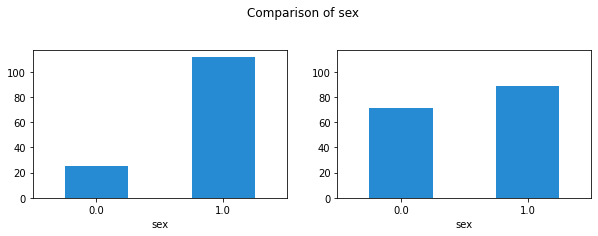

In [11]:
sideplot(df, "sex", kind="bar", title="Comparison of sex")

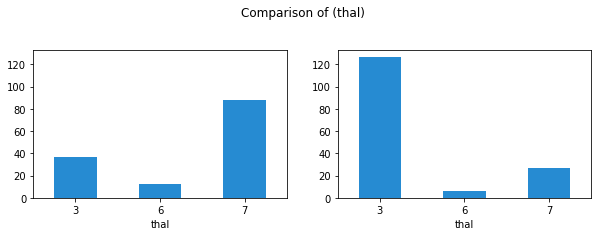

In [12]:
sideplot(df, "thal", kind="bar", title="Comparison of (thal)")

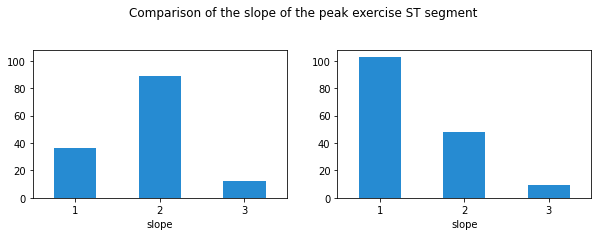

In [13]:
sideplot(df, "slope", kind="bar", title="Comparison of the slope of the peak exercise ST segment")

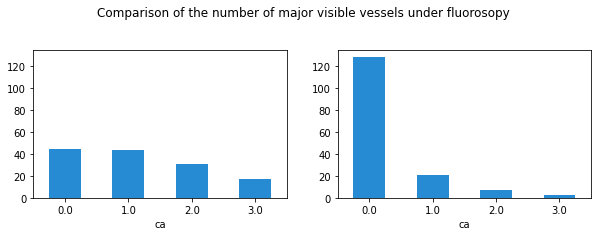

In [14]:
sideplot(df, "ca", kind="bar", title="Comparison of the number of major visible vessels under fluorosopy")

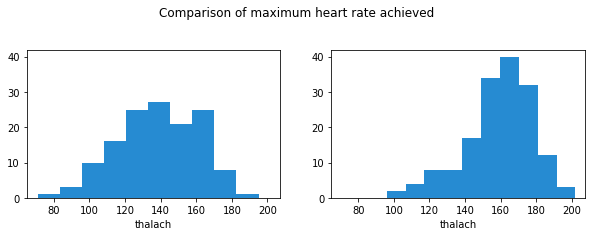

In [15]:
sideplot(df, "thalach", kind="hist", title="Comparison of maximum heart rate achieved")

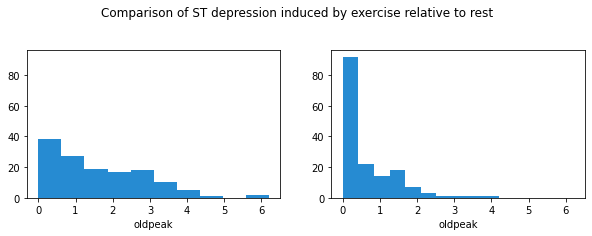

In [16]:
sideplot(df, "oldpeak", kind="hist", title="Comparison of ST depression induced by exercise relative to rest")

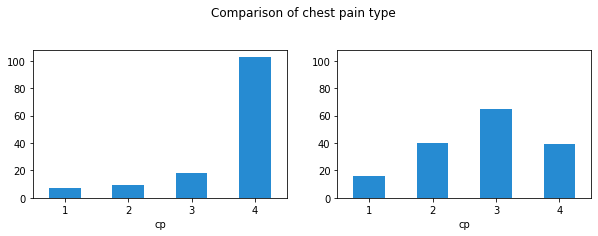

In [17]:
sideplot(df, "cp", kind="bar", title="Comparison of chest pain type")

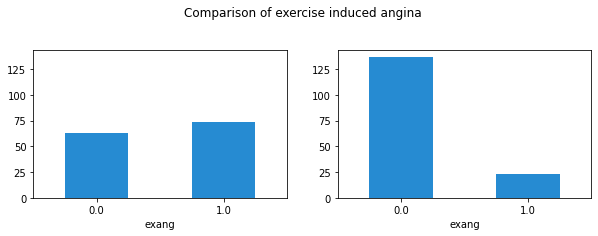

In [18]:
sideplot(df, "exang", kind="bar", title="Comparison of exercise induced angina")

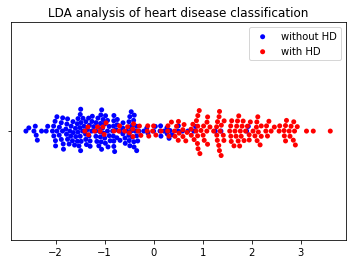

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
clf = LDA(n_components=1)

y = df["target"].values
X = clf.fit(df[df.columns[:-1]].values, y).transform(df[df.columns[:-1]].values)
X = X[:, 0]

sns.swarmplot(X[y == 0], color="b", label="without HD")
sns.swarmplot(X[y == 1], color="r", label="with HD")
plt.title("LDA analysis of heart disease classification")
plt.legend()

In [20]:
def onehot(ser, num_classes=None):
    """
    One-hot encode the series.
    Example: 
    >>> onehot([1, 0, 2], 3)
    array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])
    """
    if num_classes == None:
        num_classes = len(np.unique(ser))
    return np.identity(num_classes)[ser]

new_col_names = []
need_encode_col = ["restecg", "thal", "slope", "cp"]
no_encode_col = [col for col in df.columns if col not in need_encode_col]
new_df = df[no_encode_col]

for col in need_encode_col:
    print("---")
    print("Col: ", col)
    print("DF Col:\n", df[col])
    print("---")
    
    num_classes = df[col].max() + 1
#     num_classes = len(df[col].unique()) - np.identity tworzyło array abyt mały, bo brana była pod uwagę
                                        # ilość unikalnym wartości zamiast ich maksymalna wartość
    
    print(df[col].unique())
    print("---")
    print("Num classes: ", num_classes)
    print("---")
    
    new_col_names = [f"{col}_{i}" for i in range(num_classes)]
    encoded = pd.DataFrame(onehot(df[col], num_classes), columns=new_col_names, dtype=int)
    print(encoded)
    new_df = pd.concat([new_df, encoded], axis=1)
new_df.head()

---
Col:  restecg
DF Col:
 0      2
1      2
2      2
3      0
4      2
      ..
297    0
298    0
299    0
300    0
301    2
Name: restecg, Length: 297, dtype: int64
---
[2 0 1]
---
Num classes:  3
---
     restecg_0  restecg_1  restecg_2
0            0          0          1
1            0          0          1
2            0          0          1
3            1          0          0
4            0          0          1
..         ...        ...        ...
292          1          0          0
293          1          0          0
294          1          0          0
295          1          0          0
296          0          0          1

[297 rows x 3 columns]
---
Col:  thal
DF Col:
 0      6
1      3
2      7
3      3
4      3
      ..
297    7
298    7
299    7
300    7
301    3
Name: thal, Length: 297, dtype: int64
---
[6 3 7]
---
Num classes:  8
---
     thal_0  thal_1  thal_2  thal_3  thal_4  thal_5  thal_6  thal_7
0         0       0       0       0       0       0       1     

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,thal_7,slope_0,slope_1,slope_2,slope_3,cp_0,cp_1,cp_2,cp_3,cp_4
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
from sklearn.decomposition import PCA
clf = PCA(n_components=2)
data_cols = [col for col in new_df.columns if col != "target"]
X = new_df[data_cols]
y = new_df["target"]
X_trans = clf.fit(X, y).transform(X)
sns.scatterplot(X_trans[y == 0][:, 0], X_trans[y == 0][:, 1], color="b", label="without HD")
sns.scatterplot(X_trans[y == 1][:, 0], X_trans[y == 1][:, 1], color="r", label="with HD")
plt.title("PCA analysis of heart disease classification")
plt.legend()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').